<a href="https://colab.research.google.com/github/dlbkv/AI-Step/blob/master/module4/neuralnw_lab12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів

In [ ]:
import pandas as pd
import torch

Дані про морське вухо(молюск)

<div>
<img src="https://m.media-amazon.com/images/I/81-FC5TlLtL.jpg" width="500"/>
</div>

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/abalone.csv')
df.drop(columns=['Type', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight'], inplace=True)

In [ ]:
df.head()

,LongestShell,Diameter,Height,Rings
0,0.455,0.365,0.095,15
1,0.350,0.265,0.090,7
2,0.530,0.420,0.135,9
3,0.440,0.365,0.125,10
4,0.330,0.255,0.080,7


Потрібно на основі розмірів молюска спрогнозувати кількість кілець в мушлі `Rings`. Використовуйте процесор cpu

# Завдання 1
Створіть клас Dataset

In [ ]:
from torch.utils.data import Dataset


class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X.values)
        self.y = torch.FloatTensor(y.values)
        self.y = self.y.reshape(-1, 1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

X = df.drop(columns='Rings')
y = df['Rings']
dataset = MyDataset(X, y)

# Завдання 2
Створіть DataLoader. Перевірте розміри даних в першому пакеті. Розмір пакетів оберіть самостійно

In [ ]:
from torch.utils.data import DataLoader

batch_size = 128
dataloader = DataLoader(dataset,
                        batch_size=batch_size,
                        shuffle=True,)

In [ ]:
X_batch, y_batch = next(iter(dataloader))

torch.Size([128, 1])

# Завдання 3
Створіть нейромережу:
* Кількість шарів оберіть між 1-3
* Виберіть різні функції активації: Relu, LeakyRelu, Swish
* Кілкість нейронів у прихованих шарах повинна **не зростати**

In [ ]:
from torch import nn

model = nn.Sequential(
    nn.Linear(3, 4),
    nn.ReLU(),
    nn.Linear(4, 3),
    nn.ReLU(),
    nn.Linear(3, 1)
)

model

Sequential(
  (0): Linear(in_features=3, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=3, bias=True)
  (3): ReLU()
  (4): Linear(in_features=3, out_features=1, bias=True)
)

In [ ]:
from torchsummary import summary

summary(model, input_size=(3,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 4]              16
              ReLU-2                    [-1, 4]               0
            Linear-3                    [-1, 3]              15
              ReLU-4                    [-1, 3]               0
            Linear-5                    [-1, 1]               4
Total params: 35
Trainable params: 35
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


# Завдання 4
Визначте функцію втрат та оптимізатор

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Завдання 5
Натренуйте нейромережу. візміть невелику кількість епох

In [ ]:
import numpy as np

num_epochs = 10
losses = []
for epoch in range(num_epochs):
    losses_ = []
    for X_batch, y_batch in dataloader:
        prediction = model(X_batch)
        loss = loss_fn(prediction, y_batch)

        losses_.append(loss.item())

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    losses.append(np.mean(losses_))

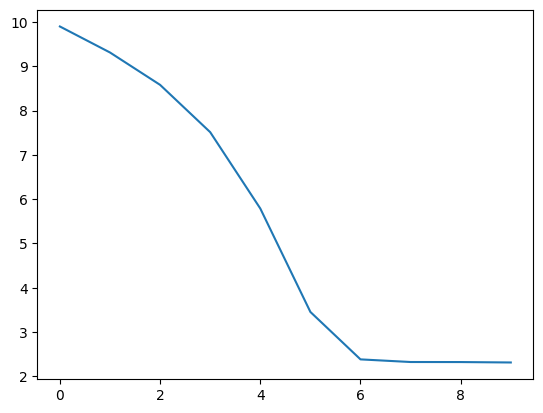

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losses)

# Завдання 6
Збережіть нейромережу та зробіть прогноз

In [ ]:
torch.save(model, 'model.pt')